# Graph
[Draw] graphs using the [ForceAtlas2] energy model. Graphs can be [directed] and/or [weighted].

For a larger example, see the [7 Degrees of Martin Brundle].


[Draw]: https://en.wikipedia.org/wiki/Graph_drawing
[ForceAtlas2]: https://doi.org/10.1371/journal.pone.0098679
[directed]: https://en.wikipedia.org/wiki/Directed_graph
[weighted]: https://en.wikipedia.org/wiki/Glossary_of_graph_theory#weighted_graph
[7 Degrees of Martin Brundle]: https://brundling.neocities.org/

In [1]:
from graph import GraphFrame

In [2]:
%load_ext autoreload
%autoreload all

from graph import *

In [3]:
kite = GraphFrame.example()
kite

GraphFrame with 36 links

<Axes: xlabel='x', ylabel='y'>

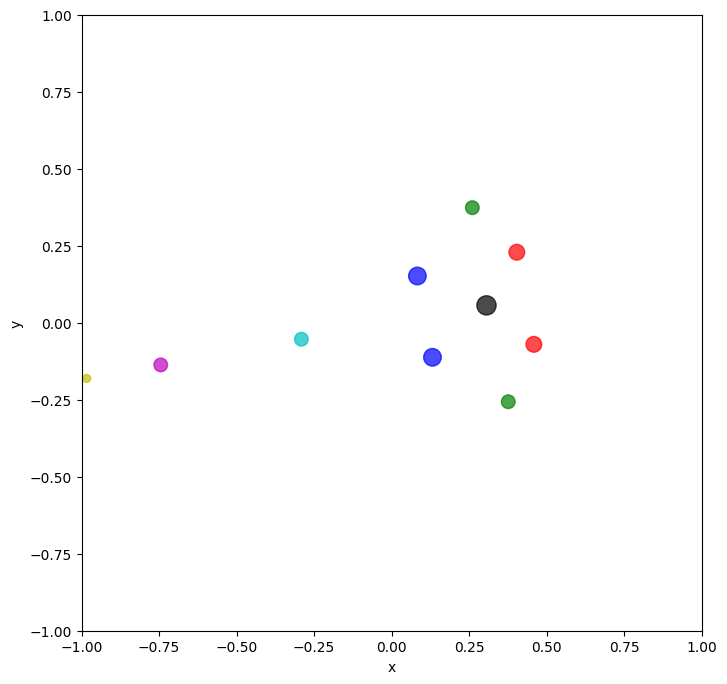

In [4]:
color = list('rrgkgbbcmy')
size = 32 * kite.degin

kite.plot(c=color, s=size)

In [5]:
print(str(kite))

a -> b: 1
a -> c: 1
a -> d: 1
a -> f: 1
b -> a: 1
b -> d: 1
b -> e: 1
b -> g: 1
c -> a: 1
c -> d: 1
c -> f: 1
d -> a: 1
d -> b: 1
d -> c: 1
d -> e: 1
d -> f: 1
d -> g: 1
e -> b: 1
e -> d: 1
e -> g: 1
f -> a: 1
f -> c: 1
f -> d: 1
f -> g: 1
f -> h: 1
g -> b: 1
g -> d: 1
g -> e: 1
g -> f: 1
g -> h: 1
h -> f: 1
h -> g: 1
h -> i: 1
i -> h: 1
i -> j: 1
j -> i: 2


## build a GraphFrame
GraphFrame can import and export several different graph data structures.

Internally, each graph is stored as a DataFrame with 3 columns: `source`, `target`, `weight`.

For example, if the node named `a` points to the node named `b` with weight 0.1, that information is stored as the row `('a', 'b', 0.1)`.

[directed graph]: https://en.wikipedia.org/wiki/Directed_graph

**from triples:** Each link is a (source, target, weight) tuple.

In [ ]:
triples = (
    ('alice', 'bob', 2),
    ('alice', 'carol', 1),
    ('bob', 'alice', 1),
    ('bob', 'carol', 1),
    ('carol', 'alice', 1),
)
graph = GraphFrame(triples)
graph

**from pairs:** Each link is a (source, target) tuple.

Links are weighted by how often they appear.

In [ ]:
pairs = (
    ('alice', 'bob'),
    ('alice', 'bob'),
    ('alice', 'carol'),
    ('bob', 'alice'),
    ('bob', 'carol'),
    ('carol', 'alice'),
)
GraphFrame(pairs)

**from sources:** Each node is a key. Each value is the list of nodes which point to that key.

In [ ]:
sources = dict()
sources['alice'] = ['bob', 'carol']
sources['bob'] = ['alice', 'alice']
sources['carol'] = ['alice','bob']
GraphFrame.from_sources(sources)

**from targets:** Each node is a key. Each value is a list of nodes to which that key points.

In [ ]:
targets = dict()
targets['alice'] = ['bob', 'bob', 'carol']
targets['bob'] = ['alice', 'carol']
targets['carol'] = ['alice']
GraphFrame.from_targets(targets)

**by [transposing] a GraphFrame**

[transposing]: https://en.wikipedia.org/wiki/Transpose_graph

In [ ]:
graph.flipped()

## graph attributes

In [ ]:
# indegree (total weight of links into each node)
graph.degin

In [ ]:
# outdegree (total weight of links out of each node)
graph.degout

In [ ]:
# access the internal DataFrame directly
graph.links

In [ ]:
# weighted links as a SciPy sparse adjacency matrix
graph.matrix

In [ ]:
# weighted links as a NumPy adjacency matrix
graph.matrix.toarray()

In [ ]:
# list of all distinct nodes
graph.nodes

In [ ]:
# Series of weights for each distinct (source, target)
graph.weights

## iterate over a graph

In [ ]:
# iterate over links (as namedtuples)
for link in graph:
    print(link)

In [ ]:
# iterate over links (as components)
for s,t,w in graph:
    print(f"{s} {t} {w}")

In [ ]:
# iterate over links without weights
for s,t in graph.pairs():
    print(f"{s} {t}")

In [ ]:
# map each node to a list of its sources
{x: y for x,y in graph.sources()}

In [ ]:
# map each node to a list of its targets
{x: y for x,y in graph.targets()}

## help

In [ ]:
help(GraphFrame)